# Task 1

In [1]:
import numpy as np   
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import pandas as pd    

In [2]:
study=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
study.shape

(25, 2)

In [3]:
study.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [4]:
study.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
study.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Percentage')

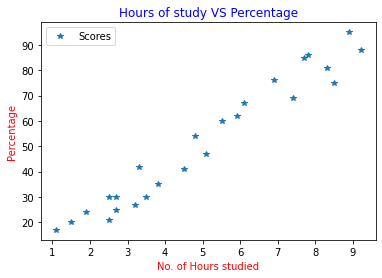

In [6]:
study.plot(x='Hours',y='Scores',style="*")
plt.title("Hours of study VS Percentage", color='b')
plt.xlabel("No. of Hours studied",color='r')
plt.ylabel("Percentage",color='r')

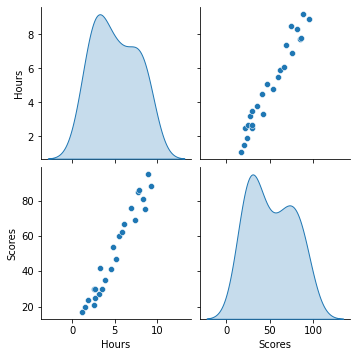

In [7]:
study_attr = study.iloc[:, 0:7]
sns.pairplot(study_attr, diag_kind='kde')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

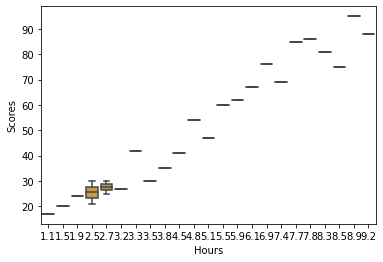

In [8]:
#we will check for any outliers in the data
sns.boxplot(study['Hours'],study['Scores'])

In [9]:
#From the above boxplot we can clearly see that the plotting is discrete and there are no outliers in the csv data

In [10]:
# lets build our linear model
#using iloc functions we will now retrieve value of rows and columns using their index number
X = study.iloc[:, :-1].values  
y = study.iloc[:, 1].values  

In [11]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [12]:
#HERE WE WILL START OUR REGRESSION MODEL WORK
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [13]:
#HERE WE WILL CHWCK THE SCORE OF OUR MODEL
reg_model.score(X_train, y_train)

0.9681980033905908

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9681980033905908


In [15]:
# Comparing Initial VS After test
ds = pd.DataFrame({'Initial': y_test, 'After test': y_pred})  
ds

,Initial,After test
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [16]:
print(X_test)
y_pred = reg_model.predict(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


Lets Calculate the percentage for user random input 

In [17]:
hours = [5]
result = reg_model.predict([hours])
print("Percentage = {}".format(round(result[0],3)))

Percentage = 50.541


Now for task input for study hours ie. 9.25 hours

In [18]:
hours = [9.25]
result = reg_model.predict([hours])
print("Percentage = {}".format(round(result[0],3)))

Percentage = 94.787


so for study hours of 9.25 hours the percentage or score for the respected hours is 94.787